In [1]:
from PatentModel import PatentModel

In [2]:
model = PatentModel()

Some weights of the model checkpoint at anferico/bert-for-patents were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
import pandas as pd

In [5]:
df = pd.read_excel("./data/A61B005專利_2005-2007.xlsx")
len(df)

1000

In [6]:
df.head()

,公告(開)號,KindCode,公告(開)日,名稱,申請日,摘要,申請範圍1,申請範圍,專利權人,IPC
0,US06925326,B1,2005-08-02,Implantable cardiac stimulation system and met...,2002-01-04,An implantable cardiac stimulation device and ...,1. A method for setting an atrioventricular de...,1. A method for setting an atrioventricular de...,"Pacesetter, Inc.",A61B005/04
1,US06935889,B2,2005-08-30,Electrode-pad package that is removable from a...,2001-02-28,A package stores at least one electrode pad ha...,"1. An electrode-pad storage system, comprising...","1. An electrode-pad storage system, comprising...",Koninklijke Philips Electronics N.V.,H01R013/52\nB65D081/124\nA61B005/04
2,US06944496,B2,2005-09-13,Apparatus for positioning and marking a locati...,2002-03-13,An apparatus for positioning and marking a loc...,1. An apparatus for positioning and marking a ...,1. An apparatus for positioning and marking a ...,Electronics and Telecommunications Research In...,A61B005/0488
3,US06957097,B2,2005-10-18,Rapid measurement of time-averaged blood flow ...,2002-04-17,Pulsatile flow is measured using magnetic reso...,1. A method of imaging pulsatile blood flow in...,1. A method of imaging pulsatile blood flow in...,The Board of Trustees of the Leland Stanford J...,A61B005/05
4,US07123954,B2,2006-10-17,Method for classifying and localizing heart ar...,2002-12-18,Analyzes surface electrocardiographic and intr...,"1. A method of analyzing a cardiac signal, com...","1. A method of analyzing a cardiac signal, com...",-,A61B005/046


In [7]:
df['申請範圍1'].iloc[0]

'1. A method for setting an atrioventricular delay in a cardiac stimulation device, the method comprising:\nmonitoring for atrial events;adjusting an atrioventricular delay until an intrinsic ventricular event is detected;maintaining the adjusted atrioventricular delay for a predetermined number of cardiac cycles; andstoring the adjusted atrioventricular delay if at least a predetermined percentage of ventricular events during the predetermined number of cardiac cycles comprise intrinsic ventricular events.'

In [8]:
df['sentence_len'] = df['申請範圍1'].apply(lambda x: len(x.split(' ')))

In [22]:
df['sentence_len'].describe()

count    1000.000000
mean      141.969000
std        75.986894
min         1.000000
25%        89.000000
50%       126.000000
75%       173.250000
max       540.000000
Name: sentence_len, dtype: float64

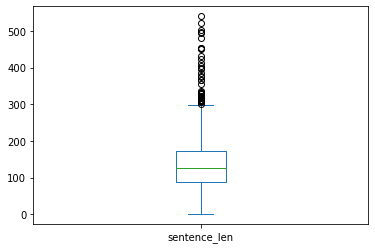

In [13]:
df['sentence_len'].plot.box()

In [14]:
df['申請範圍1'].iloc[0]

'1. A method for setting an atrioventricular delay in a cardiac stimulation device, the method comprising:\nmonitoring for atrial events;adjusting an atrioventricular delay until an intrinsic ventricular event is detected;maintaining the adjusted atrioventricular delay for a predetermined number of cardiac cycles; andstoring the adjusted atrioventricular delay if at least a predetermined percentage of ventricular events during the predetermined number of cardiac cycles comprise intrinsic ventricular events.'

In [17]:
df['sentence_len'].iloc[0]

65

In [21]:
model.tokenizer(df['申請範圍1'].iloc[0])

{'input_ids': [2, 1020, 1017, 1042, 3783, 1670, 3957, 1684, 35854, 8201, 1664, 1042, 14715, 20523, 4745, 1015, 1661, 3783, 9270, 1029, 8487, 1670, 31452, 2489, 1030, 18823, 1684, 35854, 8201, 1792, 1684, 23472, 31294, 2389, 1668, 10821, 1030, 8163, 1661, 10091, 35854, 8201, 1670, 1042, 29847, 1858, 1662, 14715, 12374, 1030, 1663, 23474, 1740, 1661, 10091, 35854, 8201, 1730, 1677, 2225, 1042, 29847, 6682, 1662, 31294, 2489, 1741, 1661, 29847, 1858, 1662, 14715, 12374, 15486, 23472, 31294, 2489, 1017, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
t1 = df.iloc[0]['申請範圍1']
t2 = df.iloc[1]['申請範圍1']


t1_emb = model.embedding(t1)
t2_emb = model.embedding(t2)


In [34]:
t1_emb

array([[-0.7387649 , -1.5866762 ,  1.8659035 , ..., -0.7375386 ,
         0.69693804, -1.2285701 ]], dtype=float32)

In [31]:
cosine_similarity(t1_emb, t2_emb)[0][0]

0.518836